In [4]:
import os
import numpy as np
import math 
import matplotlib.pyplot as plt

In [5]:
list_data_x = []
list_data_dx = []
list_data_dy = []

In [6]:
N_SDR = 8
list_particle_number = []
for i in range(1,N_SDR+1):
    if i < 10:
        list_particle_number.append(("0"+str(i)))
    else:
        list_particle_number.append((str(i)))

In [9]:
#----------------------------
# 2. FLAC model parameters
#----------------------------
num_particles = 600        #number of particles for each SDR
time_steps = 388           #total FLAC model steps
dt_step = 20.*1000 #[yr] FLAC time step for data output
yr_in_Myr = 10.**6 #[yr]

Time_compare = .1 # [Myr]

for i in range(N_SDR):
    particle_number = list_particle_number[i]

    #----------------------------
    # 1. for getting FLAC data
    #----------------------------
    Plate_thickness = "21"     # Hd in the model
    # particle_number = "02"     # which SDR particle
    
    # Get data from FLAC
    #----------------------------
    FLAC_file_path=("/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20171208-nodike-high_infill/vts_files/H"
                    +Plate_thickness)
    #FLAC_file_path=("/Users/Tian/Documents/Thesis"
    #                "/Vts_data/TianHe2/20170920/H"
    #                +Plate_thickness+"-withHealing")

    FLAC_data = open(FLAC_file_path+"/particles_"+particle_number+".0",'rb')
    data = np.fromfile(FLAC_data, dtype=np.single)
    FLAC_data.close()
    data_matrix = data.reshape((num_particles, 2, time_steps), order='F')
    data_matrix_x = data_matrix[:,0,:]
    data_matrix_y = data_matrix[:,1,:]

    data_dy = np.zeros(len(data_matrix_x[:,1]))
    data_dx = np.zeros(len(data_matrix_x[:,1]))
    data_x_dt = np.zeros(len(data_matrix_x[:,1]))


    time_data_comparison = Time_compare * yr_in_Myr 
    #[yr]  compare data at 1 Myr  (relative time, for SDR 10 at 10Myr is when it experience 1Myr of load)
    TIME = float(particle_number) + Time_compare - 1. 
    steps = int(np.ceil(TIME * yr_in_Myr / dt_step)) # the step in FLAC correspond to time_data_comparison
    steps_dt = steps + 1
    
    # fetch useful data at corresponding time
    print(steps)
    data_x = data_matrix_x[:,steps]
    data_y = data_matrix_y[:,steps]
    print(steps_dt)
    data_x_dt = data_matrix_x[:,steps_dt]
    data_y_dt = data_matrix_y[:,steps_dt]

    data_dy = data_y_dt - data_y
    data_dx = data_x_dt - data_x
    data_x_dt = data_x_dt
    
    list_data_x.append(data_x_dt[:])
    list_data_dx.append(data_dx[:])
    list_data_dy.append(data_dy[:])

6
7
55
56
105
106
155
156
205
206
255
256
305
306
355
356


In [10]:
465600/1200

388.0

In [11]:
FLAC_file_path

'/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20171208-nodike-high_infill/vts_files/H21'

In [12]:
list_data_x[0][1]

3.5757415

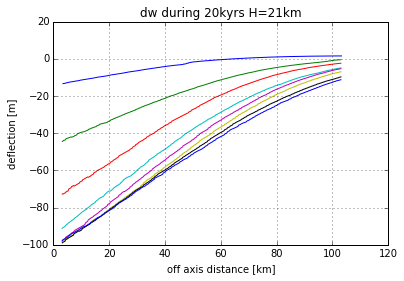

In [13]:
for i in range(N_SDR):
    #plt.plot(list_data_x[i],list_data_dy[i]*1000)
    plt.plot(list_data_x[i][:],list_data_dy[i][:]*1000)
plt.grid()
plt.title("dw during 20kyrs H=21km")
plt.xlabel("off axis distance [km]")
plt.ylabel("deflection [m]")
plt.show()


In [14]:
#for i in range(5,10):
    #plt.plot(list_data_x[i],list_data_dy[i])
#fig0,=plt.plot(list_data_x[0],list_data_dy[0],label="0")
#fig1,=plt.plot(list_data_x[3],list_data_dy[3],label="3")
fig2,=plt.plot(list_data_x[7],list_data_dy[7],label="5Myr")
fig3,=plt.plot(list_data_x[5],list_data_dy[5],label="6Myr")
#fig4,=plt.plot(list_data_x[1],list_data_dy[1],label="1")
#plt.plot(list_data_x[7],list_data_dy[7])
plt.legend()

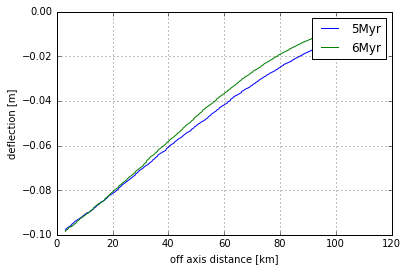

In [15]:
plt.grid()
plt.xlabel("off axis distance [km]")
plt.ylabel("deflection [m]")
plt.show()

In [16]:
len(list_data_dy)

8

In [17]:
xx = [item[2] for item in list_data_x]

In [18]:
# calculate the average x locations of the SDRs that is nearest to axis
xx_avg = sum(xx)/len(xx)*1000.
xx_avg

3510.4348361492157

In [19]:
dw0 = [item[2] for item in list_data_dy]

In [20]:
dw0 = np.array(dw0)

In [21]:
dw0*1000

array([-13.25018692, -43.99475479, -72.67835999, -90.80094147,
       -97.54193115, -97.8989563 , -98.59680939, -97.21315002], dtype=float32)

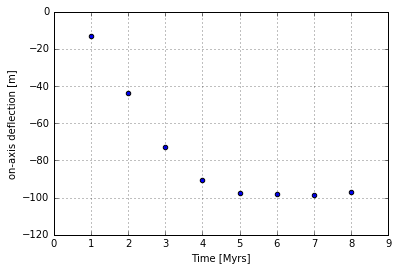

In [22]:
plt.scatter(([1,2,3,4,5,6,7,8]), dw0*1000)
plt.grid()
plt.xlabel("Time [Myrs]")
plt.ylabel("on-axis deflection [m]")
plt.show()

In [23]:
# take the steady dw0 and calc the average (from 3)
N_steady = 4 # from the figure plot
dw0_avg = sum(dw0[N_steady:]) / len(dw0[N_steady:]) * 1000
dw0_avg

-97.8127121925354

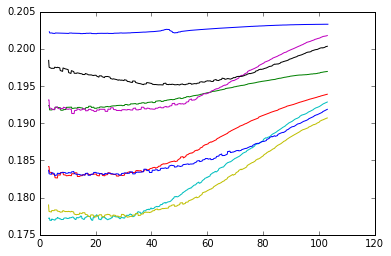

In [24]:
for i in range(N_SDR):
    plt.plot(list_data_x[i],list_data_dx[i])
plt.show()

In [25]:
int(Plate_thickness)*1000.

21000.0

In [26]:
# compare with analytic results
Hd = int(Plate_thickness)*1000.;              #[m] height of the dike
Te = int(Plate_thickness)*1000.;              #[m] effective plate thickness
g = 10.;                 #[m/s**2] gravitational acceleration
rho_d = 3000.;           #[kg/m**3] density of the solidified dike
rho_f = 2800.;           #[kg/m**3] density of the fluid dike
delta_rho_d = rho_d - rho_f;
rho_i_sedi = 2300.;
rho_i = 2800.;           #[kg/m**3] density of the infill
rho_c = 3000.;           #[kg/m**3] density of the underlying lower crust or mantle
sediment = 0;  # whether infill is sedi or lava  (1 means sedi)
if sediment == 1:
    delta_rho_c = rho_c - rho_i_sedi;
else:
    delta_rho_c = rho_c - rho_i;


E = 7.5 * 10.**10.;          #[Pa] Young's modulus; for lame constants of 30GPa
mu = 0.25;              # Poisson's ratio
D = (E * Te**3.) / (12 * (1 - mu**2.)); #[N*m] Flexural rigidity
alpha = (4. * D / (delta_rho_c * g))**0.25;#[m] Flexural wavelength
dx = dt_step / yr_in_Myr * 10. * 1000.  # [m] width of dike injection within one dt of 20kyr
dV_0 = dx * g * Hd * delta_rho_d; #[N/m] volcanic line load due to denser dike
dW_0 = 2 * dV_0 / (alpha * g * delta_rho_c)

In [27]:
dx

200.0

In [28]:

dW_0

79.6856520746051

In [29]:
alpha

105414.20922471164

In [30]:
np.exp(-xx_avg / alpha)* np.cos(xx_avg / alpha)

0.96671076263517486

In [31]:
dw0_avg

-97.8127121925354

In [32]:
# # using scypy to solve
# import sympy as sp
# from sympy.solvers import solve
# from sympy import Symbol
# alpha_n = Symbol('alpha_n')
# eq = dw0_avg - 2 * dV_0 / (alpha_n * g * delta_rho_c) \
#     * sp.exp(-xx_avg / alpha_n) * sp.cos(xx_avg / alpha_n)
# solve(eq, alpha_n)

In [33]:
dw0_avg

-97.8127121925354

In [34]:
xx_avg

3510.4348361492157

In [35]:
dV_0

8400000000.0

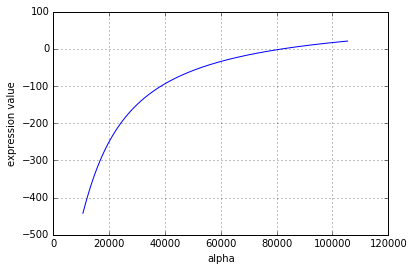

In [36]:
from scipy.optimize import fsolve
func = lambda alpha_n: \
        -dw0_avg - 2 * dV_0 / (alpha_n * g * delta_rho_c) \
         * np.exp(-xx_avg / alpha_n) * np.cos(xx_avg / alpha_n)
#plot
# Plot it

alpha_n = np.linspace(alpha/10, alpha, 201)

plt.plot(alpha_n, func(alpha_n))
plt.xlabel("alpha")
plt.ylabel("expression value")
plt.grid()
plt.show()

alpha_n_initial_guess = alpha
alpha_n_solution = fsolve(func, alpha_n_initial_guess)

In [37]:
alpha_n_solution

array([ 82213.67428482])

In [38]:
Te_n = (alpha_n_solution / (E / (3*delta_rho_c*g*(1-mu**2)))**0.25)**(4/3.)

In [39]:
Te_n

array([ 15075.75827127])

In [49]:
H = [6,8,10,12,15,18,21]
HH = [0,21]

In [50]:
Te = [2.870,4.192,5.495,7.284,9.451,12.243,15.076]

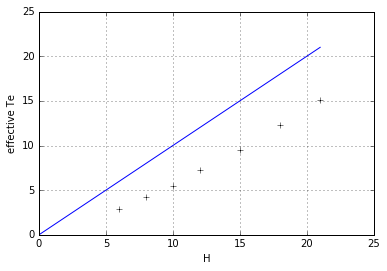

In [53]:
plt.plot(H,Te,'k+')
plt.plot(HH,HH,'b')
plt.xlabel("H")
plt.ylabel("effective Te")
plt.grid()
plt.show()